In [112]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras.applications.efficientnet
from keras.applications.efficientnet import EfficientNetB7
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2L
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [46]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [47]:
tf.__version__

'2.9.3'

In [48]:
data_base_train_folder = 'd:/Dane/retinaldiseaseclassification/prepared/ARMD/Train'
data_base_valid_folder = 'd:/Dane/retinaldiseaseclassification/prepared/ARMD/Validate'
data_base_test_folder = 'd:/Dane/retinaldiseaseclassification/prepared/ARMD/Test'
class_names = ['ARMD0', 'ARMD1']

In [49]:
training_workspace_folder = "d:/Dane/retinaldiseaseclassification/prepared/workspace/"

In [110]:
def get_confusion_matrix(model, test_data_generator):
    Y_pred = model.predict_generator(test_data_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_data_generator.classes
    cm = confusion_matrix(y_true, y_pred)
    return cm

In [50]:
def create_model_from_vgg16():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [51]:
def create_model_from_inceptionV3():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [52]:
def create_model_from_inceptionV3_B():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        #BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [53]:
def create_model_from_inceptionV3_D():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        BatchNormalization(),
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dense(16),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),        
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [54]:
def create_model_from_inceptionV3_C():
    inceptionV3 = InceptionV3(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in inceptionV3.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        inceptionV3,
        Flatten(),  
        Dense(256),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [55]:
def create_model_from_efficientnet_B():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model    

In [56]:
def create_model_from_efficientnet_C():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model  

In [57]:
def create_model_from_InceptionResNetV2_A():
    base_model = InceptionResNetV2(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [58]:
def create_model_from_VGG19_A():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [59]:
def create_model_from_VGG19_B():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [60]:
def create_model_from_VGG19_C():
    base_model = VGG19(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(16, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [61]:
def create_model_from_EfficientNetV2L_A():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(16, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [62]:
def create_model_from_EfficientNetV2L_B():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="relu"),
        Dropout(0.2),
        Dense(512, activation="relu"),
        Dropout(0.2),
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(16, activation="relu"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [63]:
def create_model_from_EfficientNetV2L_C():
    base_model = EfficientNetV2L(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(2048, activation="sigmoid"),
        Dropout(0.2),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [64]:
def create_model_from_vgg16_B():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [65]:
def create_model_from_vgg16_C():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [66]:
def create_model_from_efficientnet_D():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [67]:
def create_model_from_efficientnet_E():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return new_model 

In [68]:
def create_model_from_vgg16_D():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [69]:
def create_model_from_vgg16_E():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    vgg16.layers[-1].trainable = True
    vgg16.layers[-2].trainable = True
    vgg16.layers[-3].trainable = True
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [70]:
def create_model_from_vgg16_E():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))
    
    for layer in vgg16.layers:
        layer.trainable = False
        
    vgg16.layers[-1].trainable = True
    vgg16.layers[-2].trainable = True
    vgg16.layers[-3].trainable = True
        
    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return new_model

In [71]:
def create_model_from_vgg16_F():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in vgg16.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        vgg16,
        Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        #Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"),
        MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        Flatten(),    
        BatchNormalization(),
        #Dense(1024, activation="sigmoid"),
        #Dropout(0.2),
        Dense(512, activation="sigmoid"),
        Dropout(0.2),
        Dense(256, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return new_model

In [72]:
def create_model_from_vgg16_G():
    vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in vgg16.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        vgg16,
        Flatten(),    
        BatchNormalization(),
        Dense(4096, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return (new_model, keras.applications.vgg16.preprocess_input)

In [73]:
def create_model_from_ResNet152V2_A():
    base_model = ResNet152V2(include_top=False, weights='imagenet', input_shape=(224, 224,3))

    for layer in base_model.layers:
        layer.trainable = False

    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])

    return (new_model, keras.applications.resnet_v2.preprocess_input)

In [74]:
def create_model_from_efficientnet_C():
    base_model = EfficientNetB7(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),  
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha = 0.01),
        BatchNormalization(),
        Dense(16),
        LeakyReLU(alpha = 0.01),
        Dropout(0.3),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.efficientnet_v2.preprocess_input)

In [75]:
def create_model_from_DenseNet121_C():
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        GlobalAveragePooling2D(),  
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.densenet.preprocess_input)

In [76]:
def create_model_from_DenseNet121_D():
    base_model = DenseNet121(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(4096, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.densenet.preprocess_input)

In [77]:
def create_model_from_ResNet50_A():
    base_model = ResNet50(
        include_top = False,
        weights = "imagenet",
        input_shape = (224, 224,3))
    
    for layer in base_model.layers:
        layer.trainable = False
    
    new_model = tf.keras.models.Sequential([
        base_model,
        Flatten(),    
        BatchNormalization(),
        Dense(1024, activation="sigmoid"),
        Dropout(0.2),
        Dense(128, activation="sigmoid"),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    return (new_model, keras.applications.resnet.preprocess_input)

In [78]:
checkpointer = ModelCheckpoint(filepath = training_workspace_folder +'best_val_loss_weights.h5', verbose = 1, monitor = 'val_loss', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer2 = ModelCheckpoint(filepath = training_workspace_folder +'best_accuracy_weights.h5', verbose = 1, monitor = 'accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased
checkpointer3 = ModelCheckpoint(filepath = training_workspace_folder +'best_val_accuracy_weights.h5', verbose = 1, monitor = 'val_accuracy', mode = 'auto', save_best_only = True) #save at each epoch if the validation decreased

In [79]:
(model, selected_preprocessing_function) = create_model_from_ResNet50_A()

In [80]:
selected_preprocessing_function

<function keras.applications.resnet.preprocess_input(x, data_format=None)>

In [81]:
train_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_train_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = class_names,
    batch_size = 32)

Found 3320 images belonging to 2 classes.


In [82]:
validation_generator = ImageDataGenerator(
    zoom_range=[0.8, 1.2],
    rotation_range = 90.0,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_valid_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = class_names,
    batch_size = 32)

Found 1172 images belonging to 2 classes.


In [83]:
test_generator = ImageDataGenerator(
    preprocessing_function = selected_preprocessing_function
).flow_from_directory(
    directory = data_base_test_folder,
    class_mode = 'categorical',
    target_size = (224,224),
    classes = class_names,
    batch_size = 32)

Found 1074 images belonging to 2 classes.


In [84]:
def scheduler_I(epoch, lr):
    if epoch < 10:
        return 0.001
    
    if epoch < 20:
        return 0.0005
    
    if epoch < 50:
        return 0.0001
    
    return 0.00005

In [85]:
def scheduler_II(epoch, lr):
    if epoch < 10:
        return 0.001
    
    if epoch < 20:
        return 0.0001
    
    if epoch < 50:
        return 0.00001
    
    return 0.000005

In [86]:
learning_rate_scheduler_callback = LearningRateScheduler(scheduler_I)

In [87]:
csv_logger = CSVLogger('d:/Dane/retinaldiseaseclassification/prepared/workspace/training.log')

In [88]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
json_string = model.to_json()
open(training_workspace_folder + 'TL_model_architecture.json', 'w').write(json_string)
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs = 20,
    callbacks = [checkpointer, checkpointer2, checkpointer3, learning_rate_scheduler_callback, csv_logger]
)

C:\Users\ax\AppData\Local\Temp\ipykernel_9212\957810706.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
104/104 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7428
Epoch 1: val_loss improved from inf to 0.41337, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_val_loss_weights.h5

Epoch 1: accuracy improved from -inf to 0.74277, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_accuracy_weights.h5

Epoch 1: val_accuracy improved from -inf to 0.80973, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_val_accuracy_weights.h5
104/104 [==============================] - 447s 4s/step - loss: 0.5102 - accuracy: 0.7428 - val_loss: 0.4134 - val_accuracy: 0.8097 - lr: 0.0010
Epoch 2/20
104/104 [==============================] - ETA: 0s - loss: 0.3971 - accuracy: 0.8181
Epoch 2: val_loss improved from 0.41337 to 0.39380, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_val_loss_weights.h5

Epoch 2: accuracy improved from 0.74277 to 0.81807, saving model t

Epoch 16/20
104/104 [==============================] - ETA: 0s - loss: 0.2270 - accuracy: 0.9030
Epoch 16: val_loss did not improve from 0.36528

Epoch 16: accuracy improved from 0.89789 to 0.90301, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_accuracy_weights.h5

Epoch 16: val_accuracy did not improve from 0.86177
104/104 [==============================] - 416s 4s/step - loss: 0.2270 - accuracy: 0.9030 - val_loss: 0.3756 - val_accuracy: 0.8558 - lr: 5.0000e-04
Epoch 17/20
104/104 [==============================] - ETA: 0s - loss: 0.2235 - accuracy: 0.9036
Epoch 17: val_loss did not improve from 0.36528

Epoch 17: accuracy improved from 0.90301 to 0.90361, saving model to d:/Dane/retinaldiseaseclassification/prepared/workspace\best_accuracy_weights.h5

Epoch 17: val_accuracy did not improve from 0.86177
104/104 [==============================] - 413s 4s/step - loss: 0.2235 - accuracy: 0.9036 - val_loss: 0.5411 - val_accuracy: 0.8157 - lr: 5.0000e-04
Epoc

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 1024)              102761472 
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               131200    
                                                      

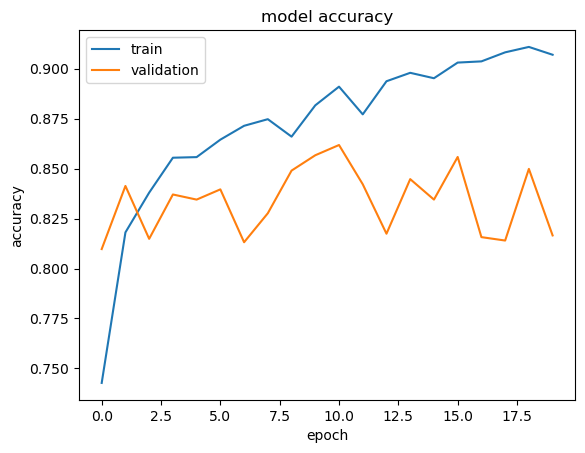

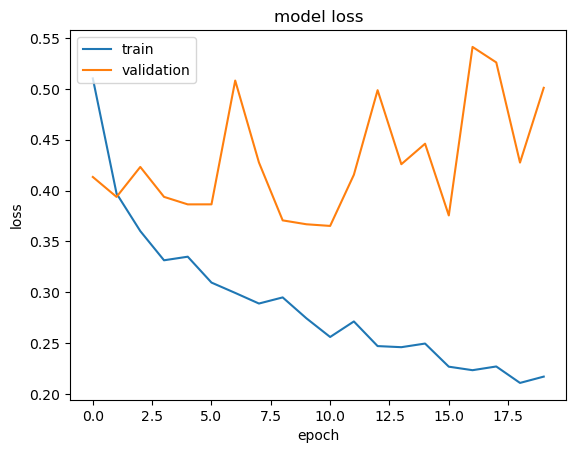

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [91]:
#scoreSeg = model.evaluate_generator(test_generator, 400)
scoreSeg = model.evaluate_generator(test_generator)

C:\Users\ax\AppData\Local\Temp\ipykernel_9212\729571264.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scoreSeg = model.evaluate_generator(test_generator)


In [92]:
scoreSeg

[0.488174706697464, 0.8175046443939209]

In [93]:
model.metrics_names

['loss', 'accuracy']

In [94]:
Y_pred = model.predict_generator(test_generator)

C:\Users\ax\AppData\Local\Temp\ipykernel_9212\3358749156.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


In [95]:
y_pred = np.argmax(Y_pred, axis=1)

In [104]:
y_true = test_generator.classes

In [105]:
cm = confusion_matrix(y_true, y_pred)

In [106]:
tn, fp, fn, tp = cm.ravel()

In [107]:
tn, fp, fn, tp

(422, 187, 321, 144)

In [108]:
print(confusion_matrix(test_generator.classes, y_pred))

[[422 187]
 [321 144]]


In [111]:
cm = get_confusion_matrix(model, test_generator)

C:\Users\ax\AppData\Local\Temp\ipykernel_9212\3029224857.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_data_generator)


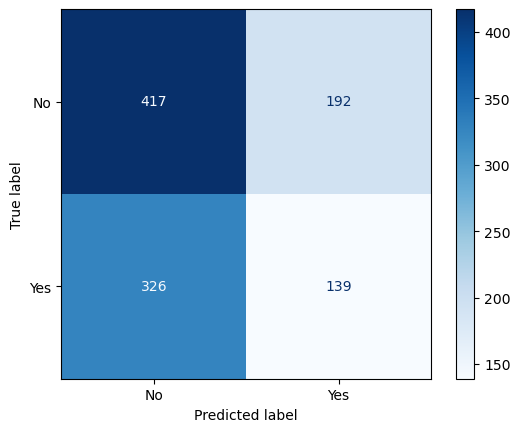

In [113]:
labels = ["No", "Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = plt.cm.Blues)
plt.show()